In [30]:
import matplotlib.pyplot as plt
from sklearn  import datasets
from sklearn.model_selection  import train_test_split
import math
#importing libraries

GD method - Simple Linear regression

In [3]:
X, y = datasets.make_regression(n_samples=100,n_features=1, random_state=123)


In [4]:
X.shape,y.shape

((100, 1), (100,))

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,shuffle= True)

In [6]:
def dot(v1,v2):
    dot_p = sum(x*y for x,y in zip(v1,v2))
    return dot_p

class LinearRegression:
    def __init__(self, lr, epochs):
        self.lr = lr
        self.w =None
        self.b = None
        self.epochs = epochs

    
    def fit(self, X, y):
        self.w = [0]
        self.b = 0

        for _ in range(self.epochs):
            y_predicted = [dot(x,self.w) + self.b for x in X]
            dJ,db = 0,0 
            for i in range(len(X)):
                dJ += (X[i] * (y_predicted[i]-y[i]))
                db += (y_predicted[i] - y[i])

            self.w -= self.lr * dJ
            self.b -= self.lr * db

    def predict(self, X):
        prediction = [dot(self.w,x) + self.b for x in X]  # X and w are 1D arrays
        return prediction    

In [7]:
LR = LinearRegression(lr=0.001,epochs= 100)
LR.fit(X_train,Y_train)
prediction = LR.predict(X_test)
len(prediction)

25

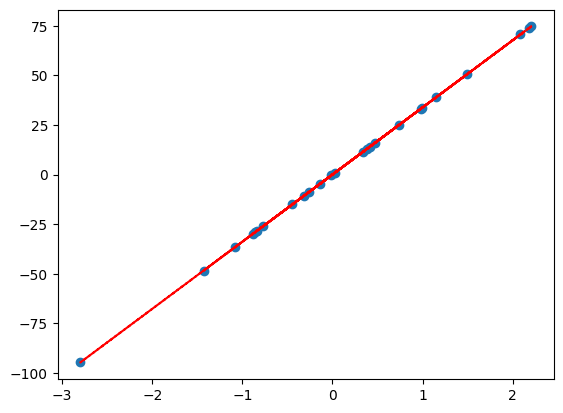

In [20]:

plt.scatter(X_test, Y_test)
plt.plot(X_test,prediction,'r--')

OLS method

y = b0 + b1 * x


B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )


B0 = mean(y) - B1 * mean(x)

In [21]:
def mean(values):
    return sum(values)/float(len(values))

def variance(values, mean):
    return sum([(x-mean)**2 for x  in values])

def covariance(x, y, mean_x, mean_y):
    cov = 0
    for i in range(len(x)):
        cov += (x[i]-mean_x)*(y[i]-mean_y)
    return cov
####

In [22]:
X = X_train
y = Y_train
mean_x = mean(X)
mean_y = mean(y)


b1 = covariance(X,y,mean_x,mean_y)/variance(X,mean_x)
b0 = mean_y - b1 * mean_x

In [23]:
b0,b1

(array([2.22044605e-16]), array([33.86708459]))

In [24]:
prediction = [b0 + b1*x for x in X_test]

In [25]:
std_x, std_y = math.sqrt(variance(X,mean_x)),  math.sqrt(variance(y,mean_y))
cov_xy = covariance(X,y,mean_x,mean_y)

def correlation(std_x,std_y,cov_xy):
    corr = cov_xy/(std_x*std_y)
    return corr

In [26]:
#Evaluation
def mean_squared_error(predicted, actual):
    error_sq = 0
    for i in range(len(actual)):
        error_sq += (actual[i] - predicted[i])**2
    mse = error_sq/len(actual)
    return mse
##

## Corr(X,Y) = Cov[X,Y] / ( StdDev(X) ∙ StdDev(Y) )

def r2_score(predicted, actual): # measures how correlated they are
    y  = predicted
    X = actual
    std_x, std_y = math.sqrt(variance(X,mean_x)),  math.sqrt(variance(y,mean_y))
    cov_xy = covariance(X,y,mean_x,mean_y)
    corr = correlation(std_x,std_y,cov_xy)
    return corr


In [27]:
mean_squared_error(prediction,X_test)[0]

1510.0911499749982

In [28]:
r2_score(prediction,X_test)[0] 

0.9999999999999997

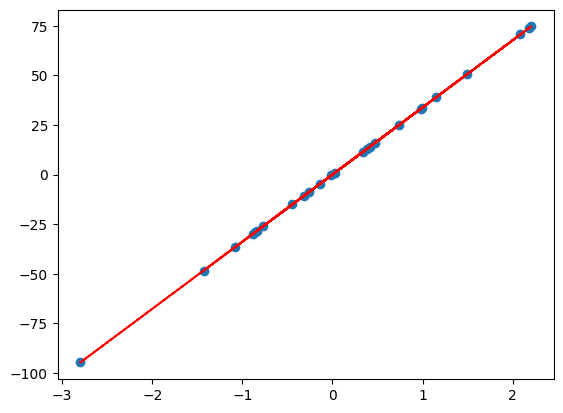

In [29]:
plt.scatter(X_test, Y_test)

plt.plot(X_test,prediction,'r--')